In [97]:
import pandas as pd
import numpy as np

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
train = pd.read_csv('titanic_train.csv')

Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. 
For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions 
that assume all and only female passengers survive, as an example 
of what a submission file should look like.

https://www.kaggle.com


In [100]:
#Checking the head of the data (Top part of the data)


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
#    The info() function is used to print a concise summary of a DataFrame. 
#    This method prints information about a DataFrame including the index dtype and 
#    column dtypes, non-null values and memory usage

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
#   describe() The describe() method is used for calculating some 
#   statistical data like percentile, mean and std of the numerical values 
#   of the Series or DataFrame. It analyzes both numeric and object series and 
#   also the DataFrame column sets of mixed data types.

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
#       The isnull() function is used to detect missing values for an array-like object. 
#       This function takes a scalar or array-like object and indicates whether values are 
#       missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike). 
#       Object to check for null or missing values

train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


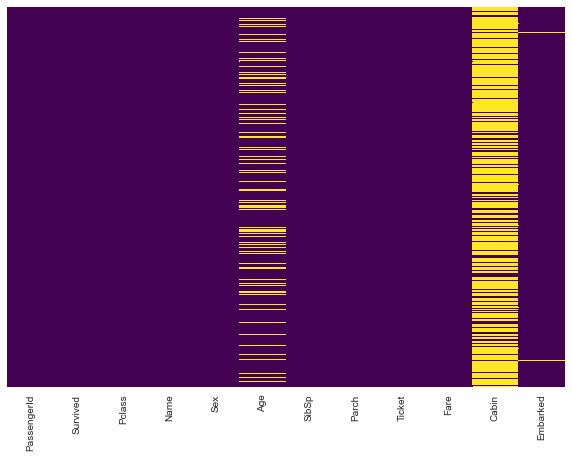

In [104]:

plt.figure(figsize = (10, 7)) # Make the figure larger
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

The Age and Cabin column has quite a large amount of missing data. It is important to assess if this information is important for the modelling process. One has to evaluate the influence of this data on the outcome of the results from model. 

In [105]:
# Controlling figure aesthetics 
sns.set_style('whitegrid')

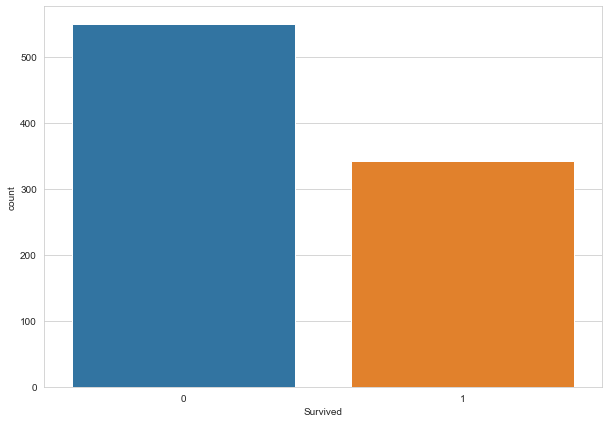

In [106]:
#    A count plot can be thought of as a histogram across a categorical, 
#    instead of quantitative, variable

plt.figure(figsize = (10, 7))  # Make the figure larg
sns.countplot(x = 'Survived', data = train )

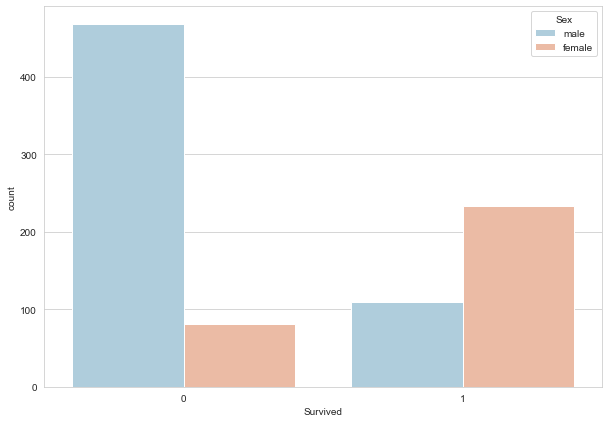

In [107]:

plt.figure(figsize = (10, 7))  # Make the figure larger
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r' )

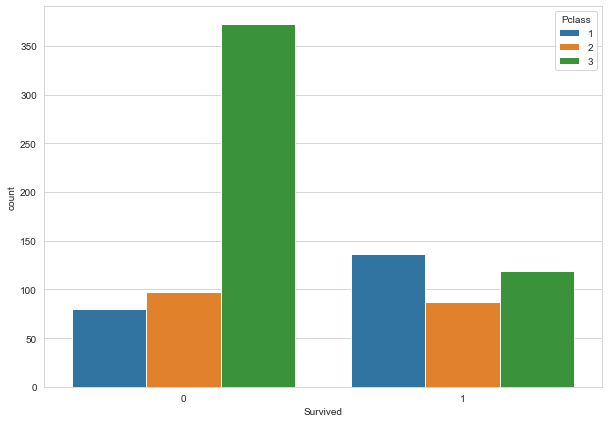

In [108]:

plt.figure(figsize = (10, 7))  # Make the figure larger
sns.countplot(x = 'Survived', hue = 'Pclass', data = train )

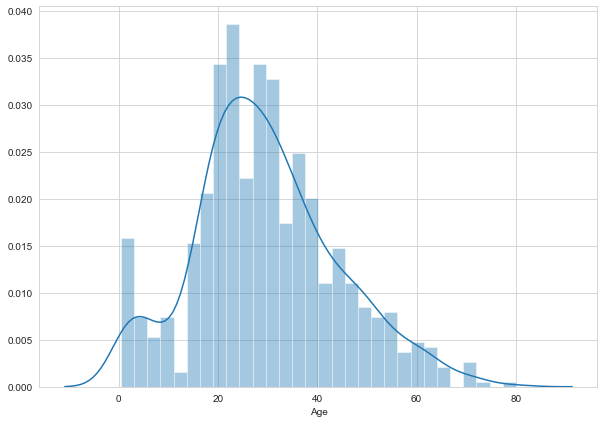

In [109]:

plt.figure(figsize = (10, 7))  # Make the figure larger
sns.distplot(train['Age'].dropna(), kde = True, bins = 30)

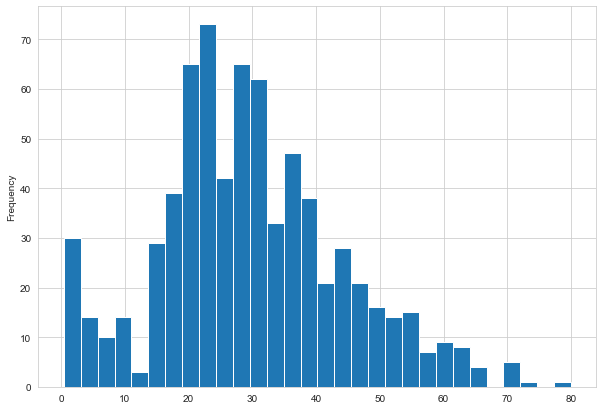

In [110]:

plt.figure(figsize = (10, 7))  # Make the figure larger
train['Age'].plot.hist(bins= 30)

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


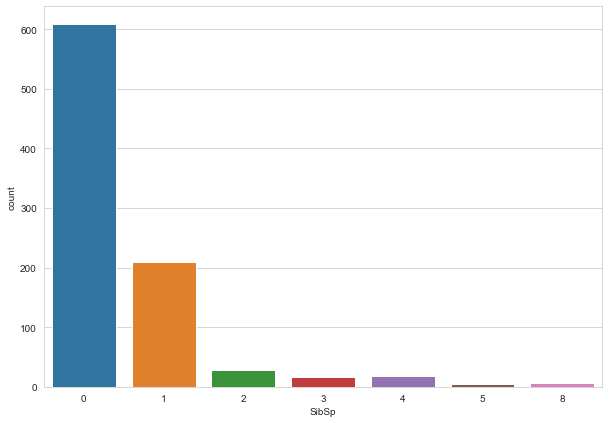

In [112]:

plt.figure(figsize = (10, 7))  # Make the figure larger
sns.countplot(x = 'SibSp', data = train)

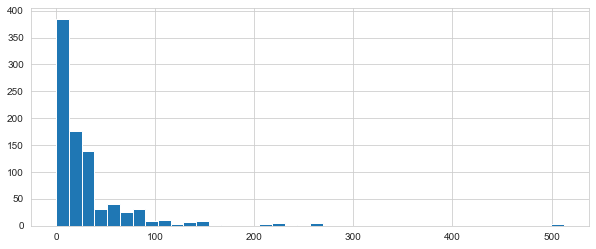

In [113]:
train['Fare'].hist(bins = 40, figsize = (10,4))

In [114]:
import cufflinks as cf
cf.go_offline()

In [116]:
train['Fare'].iplot(kind = 'hist', bins = 50)

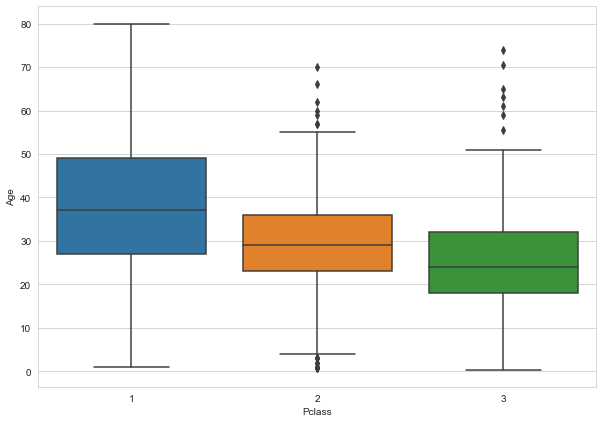

In [117]:

plt.figure(figsize = (10, 7)) # Make the figure larger

# Figure 
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [118]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return Age

In [119]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

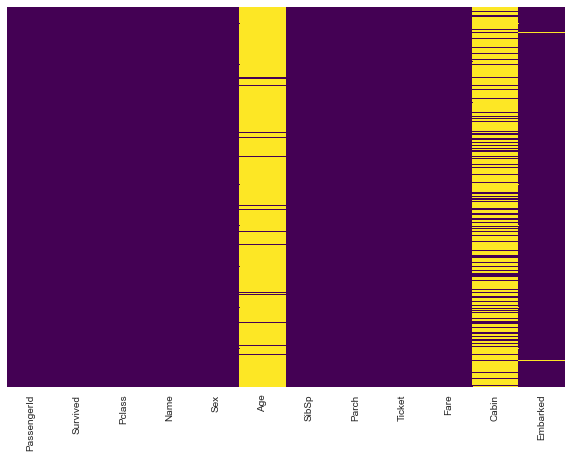

In [120]:

plt.figure(figsize = (10, 7))  # Make the figure larger
#SEABORN
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [121]:
#cleaning the data set removing 'Cabin' column
train.drop('Cabin', axis=1, inplace = True)

In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,S


In [123]:
train.dropna(inplace = True)

In [124]:
#Pandas

sex = pd.get_dummies(train['Sex'], drop_first=True)

In [125]:
sex.head()

,male
17,1
31,0
55,1
64,1
166,0


In [126]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [127]:
embark.head()

,Q,S
17,0,1
31,0,0
55,0,1
64,0,0
166,0,1


In [128]:
train = pd.concat([train, sex, embark], axis = 1)

In [129]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,S,1,0,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.0,1,0,PC 17569,146.5208,C,0,0,0


In [130]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'],axis = 1, inplace = True)

In [131]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
17,18,1,2,29.0,0,0,13.0000,1,0,1
31,32,1,1,37.0,1,0,146.5208,0,0,0
55,56,1,1,37.0,0,0,35.5000,1,0,1
64,65,0,1,37.0,0,0,27.7208,1,0,0
166,167,1,1,37.0,0,1,55.0000,0,0,1


In [132]:
train.drop('PassengerId', axis = 1, inplace = True)

In [133]:
train.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
17,1,2,29.0,0,0,13.0000,1,0,1
31,1,1,37.0,1,0,146.5208,0,0,0
55,1,1,37.0,0,0,35.5000,1,0,1
64,0,1,37.0,0,0,27.7208,1,0,0
166,1,1,37.0,0,1,55.0000,0,0,1


In [134]:
#     X corresponds to your float feature matrix of shape (n_samples, n_features) 
#     (aka. the design matrix of your training set)

#     y is the float target vector of shape (n_samples,) (the label vector). 
#     In your case, label 0 could correspond to a spam example, and 1 to a ham one


X = train.drop('Survived', axis = 1)
y = train['Survived']


In [135]:
from sklearn.model_selection import train_test_split

In [136]:
#       The test set is a subset of the data set that you use 
#       to test your model after the model has gone through initial 
#       vetting by the validation set. x_test is the test data set. y_test 
#       is the set of labels to all the data in x_test .

#       test_size — This parameter decides the size of the data that has to be split 
#       as the test dataset. This is given as a fraction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [137]:
#       Logistic Regression (aka logit, MaxEnt) classifier.

#       In the multiclass case, the training algorithm uses the one-vs-rest 
#       (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the
#       cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. 
#       (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, 
#       ‘saga’ and ‘newton-cg’ solvers.)


from sklearn.linear_model import LogisticRegression

In [138]:
logmodel = LogisticRegression()

In [139]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [140]:
predictions = logmodel.predict(X_test)

In [141]:
#     The sklearn. metrics module implements several loss, score, and utility 
#     functions to measure classification performance. Some metrics might require 
#     probability estimates of the positive class, confidence values, or binary 
#     decisions values

from sklearn.metrics import classification_report

In [142]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.50      0.67      0.57         6

    accuracy                           0.54        13
   macro avg       0.55      0.55      0.54        13
weighted avg       0.55      0.54      0.53        13



In [143]:
from sklearn.metrics import confusion_matrix

In [144]:
confusion_matrix(y_test, predictions)

array([[3, 4],
       [2, 4]])